In [1]:
!pip install spacy
!pip install newsapi-python

In [2]:
!python -m spacy download en_core_web_lg

In [3]:
import spacy
from newsapi import NewsApiClient
import pickle 
from collections import Counter
import pandas as pd
from wordcloud import WordCloud 
from matplotlib import pyplot as plt

nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient(api_key='60195d464cd34382b432d9320b5bfc21')

In [4]:
articles = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-27', to='2022-03-24', sort_by='relevancy')

In [5]:
filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))

filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

In [6]:
dados = []
for i, article in enumerate(articles):
    for x in articles['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
        dates = x['publishedAt']
        dados.append({'title':title, 'date':dates, 'desc':description, 'content':content})

In [7]:
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

,title,date,desc,content
0,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...
1,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers..."
2,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...
3,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...
4,"Can Ashish Jha, ‘A Comforting Voice,’ Tamp Dow...",2022-03-20T09:00:09Z,"Dr. Jha, the new White House coronavirus respo...","Dr. Jha was born in Bihar, a state in eastern ..."


In [8]:
def get_keywords_eng(content):
    result = []
    pos_tag = ["ADJ", "ADP", "ADV", "AUX", "CCONJ", "DET", "INTJ", "NOUN", "NUM", "PART", "PRON", "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X"]
    
    for token in content:
        if (token.text in nlp_eng.Defaults.stop_words or token.is_punct):
            continue
        if (token.pos_ in pos_tag):
            result.append(token.text)
    return result

In [9]:
results = []
for contents in df.content.values:
    content = nlp_eng(contents)
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

filename = 'COVIDdata.pckl'
pickle.dump(articles, open(filename , 'wb'))

filename = 'COVIDdata.pckl'
loaded_model = pickle.load(open(filename, 'rb'))

filepath = 'COVIDdata.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

df

,title,date,desc,content,keywords
0,"Rabbi Chaim Kanievsky, Venerated Talmudic Scho...",2022-03-18T20:26:55Z,"He initially insisted, “Canceling Torah study ...",Most significant was his ruling that instances...,"[#Most, #significant, #ruling, #instances, #se..."
1,Can Eric Adams Cheerlead New Yorkers Past the ...,2022-03-20T16:11:17Z,The mayor is singularly focused on bringing ba...,"Mr. Adams, a Democrat, has had regular convers...","[#Mr., #Adams, #Democrat, #regular, #conversat..."
2,Moderna Asks F.D.A. to Authorize a Second Boos...,2022-03-18T09:08:37Z,The request is significantly broader than the ...,A man receiving a second booster of a coronavi...,"[#Moderna, #A, #man, #receiving, #second]"
3,China Reports Its First Covid Deaths in Over a...,2022-03-19T13:37:04Z,The two fatalities are the first coronavirus d...,Scarcely two months after the Omicron variant ...,"[#Scarcely, #months, #Omicron, #variant, #drove]"
4,"Can Ashish Jha, ‘A Comforting Voice,’ Tamp Dow...",2022-03-20T09:00:09Z,"Dr. Jha, the new White House coronavirus respo...","Dr. Jha was born in Bihar, a state in eastern ...","[#Dr., #Jha, #born, #Bihar, #state]"
5,"Preschoolers Can Shed Their Masks, Mayor Adams...",2022-03-22T18:11:14Z,New York City plans to end the mask requiremen...,"Earlier this month, when Mr. Adams eliminated ...","[#said, #Earlier, #month, #Mr., #Adams]"
6,"2 Years After Declaring Pandemic, W.H.O. Urges...",2022-03-11T09:29:44Z,Exactly two years after saying that the corona...,"The World Health Organization, often criticize...","[#The, #World, #Health, #Organization, #critic..."
7,"Ukraine, Coronavirus, Pompeii: Your Friday Eve...",2022-03-11T23:33:10Z,Here’s what you need to know at the end of the...,"10. And finally, if he could turn back time \r...","[#time, #hour, #10, #And, #finally]"
8,"Knocked Down by Covid in Beijing, Vincent Zhou...",2022-03-19T04:29:38Z,Zhou missed the men’s individual event at the ...,Its a fair question. He double masked. He wore...,"[#He, #Its, #fair, #question, #double]"
9,Rise of Omicron Subvariant in Europe Could Be ...,2022-03-17T09:29:24Z,Past coronavirus surges in Europe have predict...,"A street festival in Cologne, Germany. Coronav...","[#A, #street, #festival, #Cologne, #Germany]"


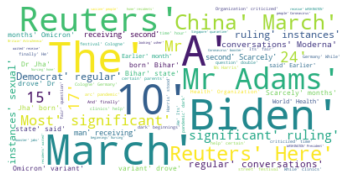

In [10]:
text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()